In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
# 파일 경로 설정
merged_data_path = 'C:/Users/82106/Desktop/데이터 분석 프로젝트 2/날씨 빅데이터 콘테스트/데이터/merged_data.csv'
merged_data= pd.read_csv(merged_data_path, encoding='cp949')

In [5]:
# 독립 변수 및 종속 변수 설정
X = merged_data.drop(['강수량(mm)', '날짜'], axis=1)  # '날짜' 열과 타겟 열 제외
y = merged_data['강수량(mm)']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구조 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 첫 번째 은닉층
    Dense(64, activation='relu'),  # 두 번째 은닉층
    Dense(1, activation='linear')  # 출력층
])

c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 컴파일 단계
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 127.6977 - mae: 5.7765 - val_loss: 72.5528 - val_mae: 2.7946
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 62.9779 - mae: 3.0801 - val_loss: 76.1467 - val_mae: 4.3785
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.6148 - mae: 3.6449 - val_loss: 68.6227 - val_mae: 3.0370
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 80.7617 - mae: 3.4127 - val_loss: 72.7026 - val_mae: 4.0954
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72.0724 - mae: 3.0816 - val_loss: 63.7542 - val_mae: 2.5139
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.4836 - mae: 3.1825 - val_loss: 67.0711 - val_mae: 3.0978
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.5861 - mae: 3.0115 - val_loss: 78.2646 - val_mae: 4.6885
Epoch 8/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71.7498 - mae: 3.1820 - val_loss: 62.7827 - val_mae: 3.1178
Epoch 9/50
360/360 ━━━━━━━━━━━━━━━━━━━━

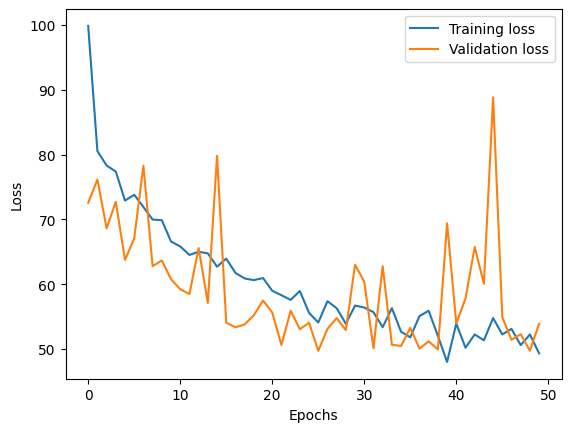

In [9]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# 모델 평가
test_results = model.evaluate(X_test, y_test, verbose=1)
test_loss, test_metric = test_results[0], test_results[1]  # 이 코드는 메트릭이 하나인 경우를 가정

print(f"Test Loss (RMSE): {test_loss:.3f}")
print(f"Test Metric (e.g., MAE): {test_metric:.3f}")  # 메트릭의 종류에 따라 레이블을 적절히 조정


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 67.5922 - mae: 1.7291
Test Loss (RMSE): 56.736
Test Metric (e.g., MAE): 1.679
